In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_file(file_name):
    hist = []
    hist_temp = []
    hist_conv = []
    hist_count = []
    with open(file_name, 'r') as file:
        for line in file.readlines():
            if line[0:4] == 'Time':
                if hist_count != [] and hist_conv != []:
                    hist_temp.append(hist_count) 
                    hist_temp.append(hist_conv) 
                    hist.append(hist_temp)
                hist_count = []
                hist_conv = []
                hist_temp = []
                hist_temp.append(float(line.strip('Time (s): ')))
            else:
                line = line.strip('. \n').split('	clat: ')
                hist_count.append(int(line[0]))
                hist_conv.append(int(line[1]))
        hist_temp.append(hist_count) 
        hist_temp.append(hist_conv) 
        hist.append(hist_temp)
    return hist

Start time(s):  0.9
End time(s):  1
Occurring convergence:  [59, 1, 40, 60]
Occurring probabilities:  [0.7789221077892211, 0.7789221077892211, 1.0, 0.22107789221077892]


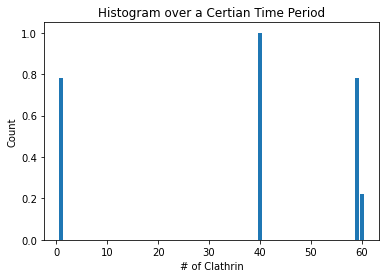

In [3]:
def hist_period(file_name):
    t_i = 0.9
    t_f = 1
    hist = read_file(file_name)
    plot_count = []
    plot_conv = []
    tot = 0
    for i in hist:
        if t_i <= i[0] <= t_f:
            tot += 1
            for j in i[2]:
                if j not in plot_conv:
                    plot_conv.append(j)
                    plot_count.append(i[1][i[2].index(j)])
                else:
                    index = plot_conv.index(j)
                    plot_count[index] += i[1][i[2].index(j)]
    plot_count_mean = []                
    for i in plot_count:
        plot_count_mean.append(i/tot)
    print('Start time(s): ', t_i)
    print('End time(s): ', t_f)
    print('Occurring convergence: ', plot_conv)
    print('Occurring probabilities: ', plot_count_mean)
    plt.bar(plot_conv, plot_count_mean)
    plt.title('Histogram over a Certian Time Period')
    plt.xlabel('# of Clathrin')
    plt.ylabel('Count')
    plt.show()
    
if __name__ == '__main__':
    hist_period('histogram_complexes_time.dat')

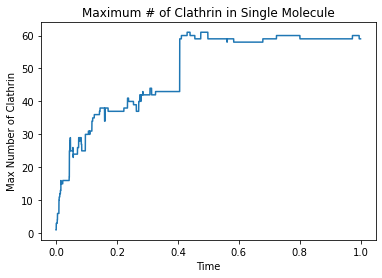

In [10]:
def hist_max_old(file_name):
    t_i = 0
    t_f = 1
    hist = read_file(file_name)
    plot_time = []
    plot_conv = []
    for i in hist:
        if t_i <= i[0] <= t_f:
            plot_time.append(i[0])
            plot_conv.append(max(i[2]))
    plt.plot(plot_time, plot_conv)
    plt.title('Maximum # of Clathrin in Single Molecule')
    plt.xlabel('Time')
    plt.ylabel('Max Number of Clathrin')
    plt.show()
            
if __name__ == '__main__':
    hist_max_old('histogram_complexes_time.dat')          

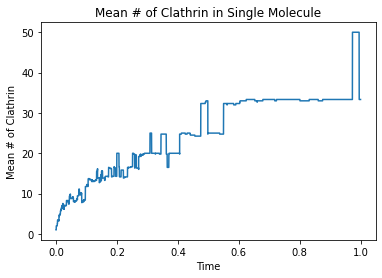

In [11]:
def hist_mean_old(file_name):
    t_i = 0
    t_f = 1
    hist = read_file(file_name)
    plot_time = []
    plot_conv = []
    for i in hist:
        if t_i <= i[0] <= t_f:
            plot_time.append(i[0])
            plot_conv.append(np.mean(i[2]))
    plt.plot(plot_time, plot_conv)
    plt.title('Mean # of Clathrin in Single Molecule')
    plt.xlabel('Time')
    plt.ylabel('Mean # of Clathrin')
    plt.show()
            
if __name__ == '__main__':
    hist_mean_old('histogram_complexes_time.dat')          

In [6]:
def time_valid(file_name, t_i, t_f):
    hist = read_file(file_name)
    min_time = hist[0][0]
    max_time = hist[-1][0]
    if t_i == -1 and t_f == -1:
        return min_time, max_time 
    elif min_time <= t_i <= max_time and t_i <= t_f <= max_time:
        return t_i, t_f
    else:
        print('Wrong input time period!')
        return -1.0, -1.0
        

Start time(s):  0.9
End time(s):  1.0
Occurring # of clathrin:  [59, 1, 40, 60]
Occurring probabilities:  [0.7789221077892211, 0.7789221077892211, 1.0, 0.22107789221077892]


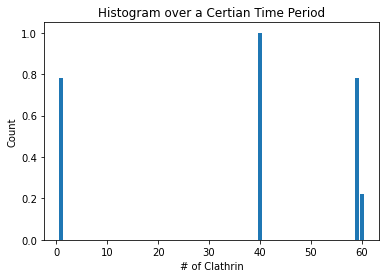

In [12]:
def hist(file_name, t_i, t_f):
    t_i, t_f = time_valid(file_name, t_i, t_f)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name)
        plot_count = []
        plot_conv = []
        tot = 0
        for i in hist:
            if t_i <= i[0] <= t_f:
                tot += 1
                for j in i[2]:
                    if j not in plot_conv:
                        plot_conv.append(j)
                        plot_count.append(i[1][i[2].index(j)])
                    else:
                        index = plot_conv.index(j)
                        plot_count[index] += i[1][i[2].index(j)]
        plot_count_mean = []                
        for i in plot_count:
            plot_count_mean.append(i/tot)
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        print('Occurring # of clathrin: ', plot_conv)
        print('Occurring probabilities: ', plot_count_mean)
        plt.bar(plot_conv, plot_count_mean)
        plt.title('Histogram over a Certian Time Period')
        plt.xlabel('# of Clathrin')
        plt.ylabel('Count')
        plt.show()
        return 0
    else:
        return 0
    
if __name__ == '__main__':
    hist('histogram_complexes_time.dat', 0.9, 1.0)

Start time(s):  0.0
End time(s):  1.0


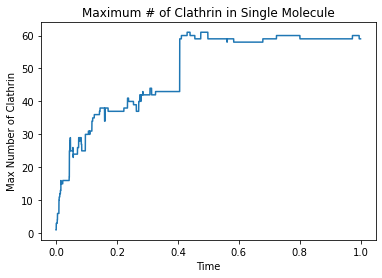

In [14]:
def max_complex(file_name, t_i, t_f):
    t_i, t_f = time_valid(file_name, t_i, t_f)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name)
        plot_time = []
        plot_conv = []
        for i in hist:
            if t_i <= i[0] <= t_f:
                plot_time.append(i[0])
                plot_conv.append(max(i[2]))
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        plt.plot(plot_time, plot_conv)
        plt.title('Maximum # of Clathrin in Single Molecule')
        plt.xlabel('Time')
        plt.ylabel('Max Number of Clathrin')
        plt.show()
        return 0
    else:
        return 0
            
if __name__ == '__main__':
    max_complex('histogram_complexes_time.dat', 0.0, 1.0)          

Start time(s):  0
End time(s):  0.5
Exclude Monomers:  True


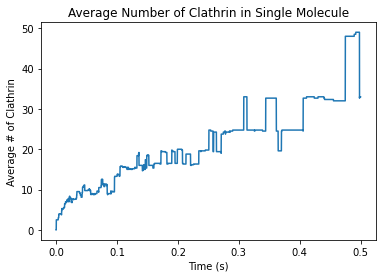

In [16]:
def mean_complex(file_name, t_i, t_f, ExcludeMono = False):
    t_i, t_f = time_valid(file_name, t_i, t_f)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name)
        plot_time = []
        plot_conv = []
        if not ExcludeMono:
            for i in hist:
                if t_i <= i[0] <= t_f:
                    plot_time.append(i[0])
                    plot_conv.append(np.mean(i[2]))
        else:
            for i in hist:
                if t_i <= i[0] <= t_f:
                    count = 1
                    N = 0
                    temp_sum = 0
                    plot_time.append(i[0])
                    while count <= len(i[1]):
                        if i[2][count-1] != 1:
                            temp_sum += i[2][count-1]
                            N += 1
                        if count == len(i[1]):
                            if N != 0:
                                plot_conv.append(temp_sum/N)
                            else:
                                plot_conv.append(0)
                        count += 1
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        print('Exclude Monomers: ', ExcludeMono)
        plt.plot(plot_time, plot_conv)
        plt.title('Average Number of Clathrin in Single Molecule')
        plt.xlabel('Time (s)')
        plt.ylabel('Average # of Clathrin')
        plt.show()
        return 0
    else:
        return 0
            
if __name__ == '__main__':
    mean_complex('histogram_complexes_time.dat', 0, 0.5, True)          

In [3]:
def read_file_all(file_name):
    hist = []
    hist_temp = []
    hist_conv = []
    hist_count = []
    with open(file_name, 'r') as file:
        for line in file.readlines():
            if line[0:4] == 'Time':
                if hist_count != [] and hist_conv != []:
                    hist_temp.append(hist_count) 
                    hist_temp.append(hist_conv) 
                    hist.append(hist_temp)
                hist_count = []
                hist_conv = []
                hist_temp = []
                hist_temp.append(float(line.strip('Time (s): ')))
            else:
                line = line.strip('. \n').split('	clat: ')
                hist_count.append(int(line[0]))
                hist_conv.append(int(line[1]))
        hist_temp.append(hist_count) 
        hist_temp.append(hist_conv) 
        hist.append(hist_temp)
    return hist

read_file_all('histogram_complexes_time.dat')

[[0.0, [100], [1]],
 [1e-05, [100], [1]],
 [2e-05, [100], [1]],
 [3e-05, [100], [1]],
 [4e-05, [100], [1]],
 [5e-05, [100], [1]],
 [6e-05, [100], [1]],
 [7e-05, [100], [1]],
 [8e-05, [100], [1]],
 [9e-05, [98, 1], [1, 2]],
 [0.0001, [98, 1], [1, 2]],
 [0.00011, [98, 1], [1, 2]],
 [0.00012, [98, 1], [1, 2]],
 [0.00013, [98, 1], [1, 2]],
 [0.00014, [98, 1], [1, 2]],
 [0.00015, [98, 1], [1, 2]],
 [0.00016, [96, 2], [1, 2]],
 [0.00017, [96, 2], [1, 2]],
 [0.00018, [96, 2], [1, 2]],
 [0.00019, [95, 1, 1], [1, 3, 2]],
 [0.0002, [93, 2, 1], [1, 2, 3]],
 [0.00021, [93, 2, 1], [1, 2, 3]],
 [0.00022, [93, 2, 1], [1, 2, 3]],
 [0.00023, [93, 2, 1], [1, 2, 3]],
 [0.00024, [93, 2, 1], [1, 2, 3]],
 [0.00025, [93, 2, 1], [1, 2, 3]],
 [0.00026, [93, 2, 1], [1, 2, 3]],
 [0.00027, [93, 2, 1], [1, 2, 3]],
 [0.00028, [93, 2, 1], [1, 2, 3]],
 [0.00029, [93, 2, 1], [1, 2, 3]],
 [0.0003, [93, 2, 1], [1, 2, 3]],
 [0.00031, [93, 2, 1], [1, 2, 3]],
 [0.00032, [93, 2, 1], [1, 2, 3]],
 [0.00033, [93, 2, 1], [1, 2,